In [29]:
yol = "../../Egzersizler/datasets/titanic/train.csv"

In [30]:
import pandas
pandas.__version__

'2.3.1'

In [31]:
df = pandas.read_csv(yol)

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [35]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [36]:
maleSurvived = df[(df["Sex"] == 'male') & (df["Survived"] == 1)]
femaleSurvived = df[(df["Sex"] == 'female') & (df["Survived"] == 1)]

In [37]:
maleSurvived.count()

PassengerId    109
Survived       109
Pclass         109
Name           109
Sex            109
Age             93
SibSp          109
Parch          109
Ticket         109
Fare           109
Cabin           45
Embarked       109
dtype: int64

In [38]:
femaleSurvived.count()

PassengerId    233
Survived       233
Pclass         233
Name           233
Sex            233
Age            197
SibSp          233
Parch          233
Ticket         233
Fare           233
Cabin           91
Embarked       231
dtype: int64

In [39]:
crosstab_result = pandas.crosstab(df["Survived"], df["Sex"], margins=True, margins_name="Total")
print(crosstab_result)

Sex       female  male  Total
Survived                     
0             81   468    549
1            233   109    342
Total        314   577    891


In [40]:
df.columns
df = df.dropna(subset=['Age'])
df.drop(["Cabin"],axis=1,inplace=True)

In [41]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  714 non-null    int64  
 1   Survived     714 non-null    int64  
 2   Pclass       714 non-null    int64  
 3   Name         714 non-null    object 
 4   Sex          714 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        714 non-null    int64  
 7   Parch        714 non-null    int64  
 8   Ticket       714 non-null    object 
 9   Fare         714 non-null    float64
 10  Embarked     714 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 66.9+ KB


In [43]:
# Define age bins and labels
bins = [0, 12, 18, 35, 60, 100]  # Define the age ranges
labels = ['Child', 'Teen', 'Adult', 'Middle-Aged', 'Senior']  # Define the labels for the age groups

# Create a new column for age groups
df['AgeGroup'] = pandas.cut(df['Age'], bins=bins, labels=labels, right=False)

# Calculate survival rate by age group
survival_rate_by_age_group = df.groupby('AgeGroup')['Survived'].mean().reset_index()

# Rename the column for clarity
survival_rate_by_age_group.rename(columns={'Survived': 'SurvivalRate'}, inplace=True)

/tmp/ipykernel_109388/1667388453.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_rate_by_age_group = df.groupby('AgeGroup')['Survived'].mean().reset_index()


In [44]:
print(survival_rate_by_age_group)

      AgeGroup  SurvivalRate
0        Child      0.573529
1         Teen      0.488889
2        Adult      0.368852
3  Middle-Aged      0.416268
4       Senior      0.269231


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_109388/3975053399.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='AgeGroup', y='SurvivalRate', data=survival_rate_by_age_group, palette='viridis')


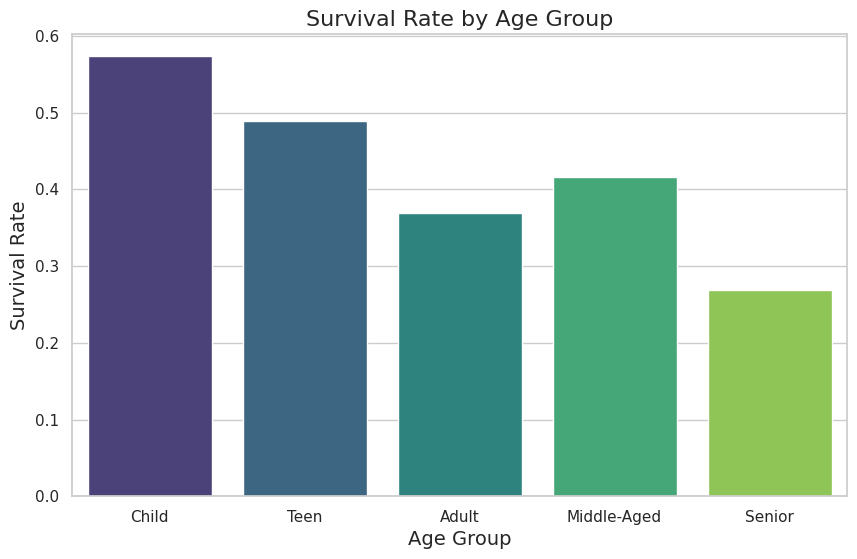

In [46]:
# Set the visual style
sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='SurvivalRate', data=survival_rate_by_age_group, palette='viridis')

# Add titles and labels
plt.title('Survival Rate by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Survival Rate', fontsize=14)

# Show the plot
plt.show()

In [47]:
df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [48]:
fare_by_class_group = df.groupby('Pclass')['Fare'].mean().reset_index()

In [49]:
fare_by_class_group

,Pclass,Fare
0,1,87.961582
1,2,21.471556
2,3,13.229435


In [50]:
df["Embarked"].value_counts()

Embarked
S    556
C    130
Q     28
Name: count, dtype: int64

In [55]:
df["Sex_numeric"] = df["Sex"].map({"male":1,"female":0})
embarked_dummies = pandas.get_dummies(df["Embarked"], prefix="Embarked")

# Concatenate the dummy variables to the original DataFrame
df = pandas.concat([df, embarked_dummies], axis=1)

# Map the dummy variables directly to numeric values
df["Embarked_C_num"] = embarked_dummies["Embarked_C"].astype(int)
df["Embarked_Q_num"] = embarked_dummies["Embarked_Q"].astype(int)
df["Embarked_S_num"] = embarked_dummies["Embarked_S"].astype(int)
df_numeric = df.select_dtypes(include=['number'])

In [56]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Sex_numeric,Embarked_C,Embarked_Q,Embarked_S,Embarked_C_num,Embarked_Q_num,Embarked_S_num,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,False,False,True,0,0,1,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,True,False,False,1,0,0,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,False,False,True,0,0,1,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,False,False,True,0,0,1,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,False,False,True,0,0,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,...,0,False,True,False,0,1,0,False,True,False
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,1,False,False,True,0,0,1,False,False,True
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,False,False,True,0,0,1,False,False,True
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,1,True,False,False,1,0,0,True,False,False


In [57]:
df_numeric.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_numeric,Embarked_C_num,Embarked_Q_num,Embarked_S_num
PassengerId,1.000000,0.029340,-0.035349,0.036847,-0.082398,-0.011617,0.009592,0.024575,0.008638,-0.026954,0.004574
Survived,0.029340,1.000000,-0.359653,-0.077221,-0.017358,0.093317,0.268189,-0.538826,0.193607,-0.049549,-0.156815
Pclass,-0.035349,-0.359653,1.000000,-0.369226,0.067247,0.025683,-0.554182,0.155460,-0.276294,0.132415,0.194935
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.023233
SibSp,-0.082398,-0.017358,0.067247,-0.308247,1.000000,0.383820,0.138329,-0.103950,-0.045462,0.051619,0.018126
Parch,-0.011617,0.093317,0.025683,-0.189119,0.383820,1.000000,0.205119,-0.246972,-0.008846,-0.009126,0.012491
Fare,0.009592,0.268189,-0.554182,0.096067,0.138329,0.205119,1.000000,-0.184994,0.299797,-0.062765,-0.249353
Sex_numeric,0.024575,-0.538826,0.155460,0.093254,-0.103950,-0.246972,-0.184994,1.000000,-0.101580,-0.026440,0.106796
Embarked_C_num,0.008638,0.193607,-0.276294,0.036261,-0.045462,-0.008846,0.299797,-0.101580,1.000000,-0.095320,-0.885063
Embarked_Q_num,-0.026954,-0.049549,0.132415,-0.022405,0.051619,-0.009126,-0.062765,-0.026440,-0.095320,1.000000,-0.378988


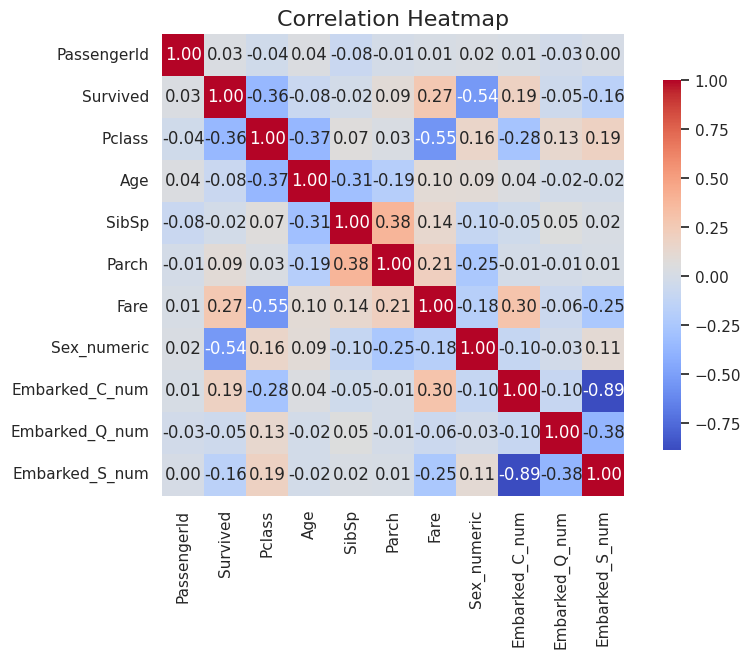

In [58]:
correlation_matrix = df_numeric.corr()

# Set the visual style
sns.set(style="white")

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add titles and labels
plt.title('Correlation Heatmap', fontsize=16)

# Show the plot
plt.show()